In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\Dayam Nadeem\Documents\7th sem minor diabeties\diabetes_prediction_dataset.csv')


In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
print(df.duplicated())
print(df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
3854


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
numeric_col=[]
non_numeric_col=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        if(df[column].nunique()<5):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)

In [12]:
print(numeric_col)
print(non_numeric_col)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


In [13]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(12,10))    
    sns.histplot(x=df[col], kde=True, bins=20, color='skyblue',ax=ax[0])
    ax[0].set_title(f'Histogram of {col}.')
    
    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}     ')

 Univariate analysis for age column:


C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


 Univariate analysis for bmi column:


C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


 Univariate analysis for HbA1c_level column:


C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


 Univariate analysis for blood_glucose_level column:


C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


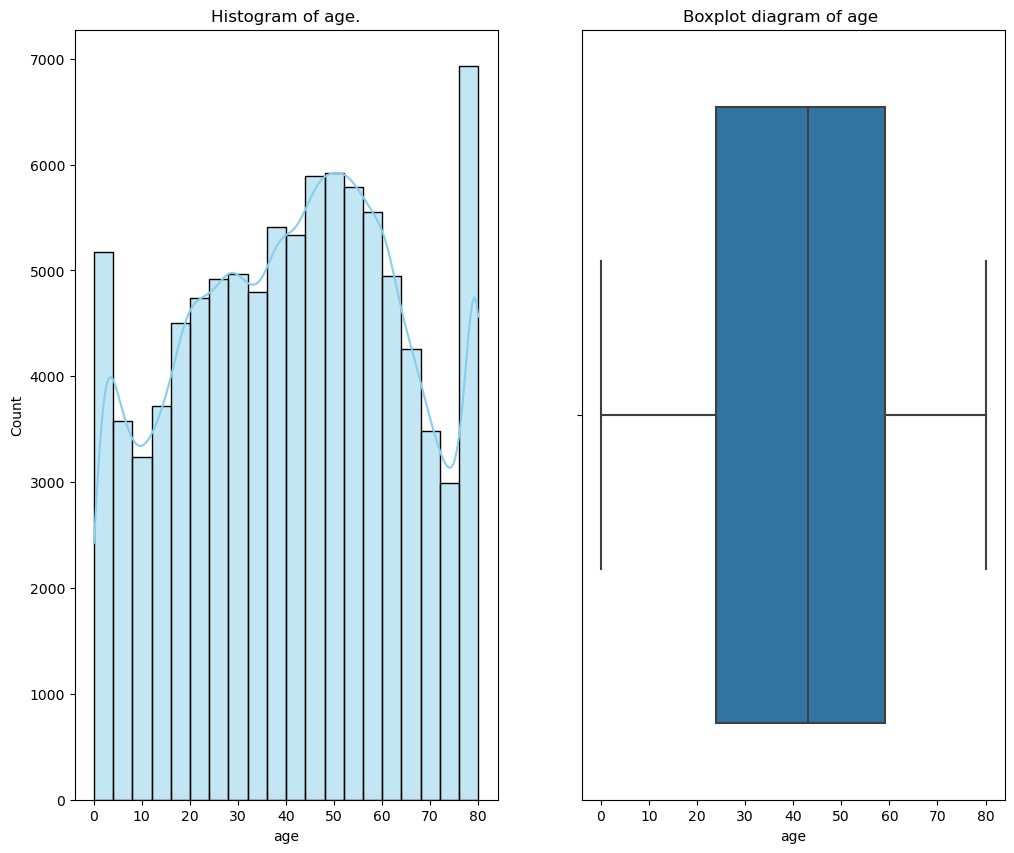

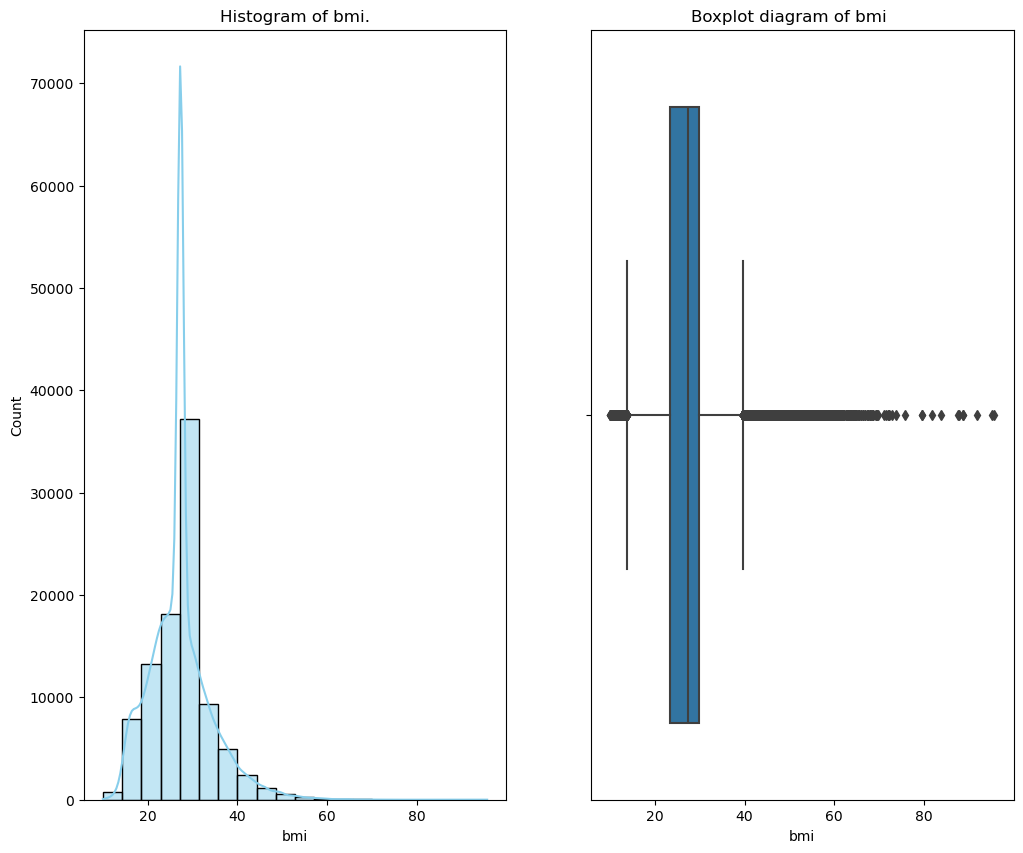

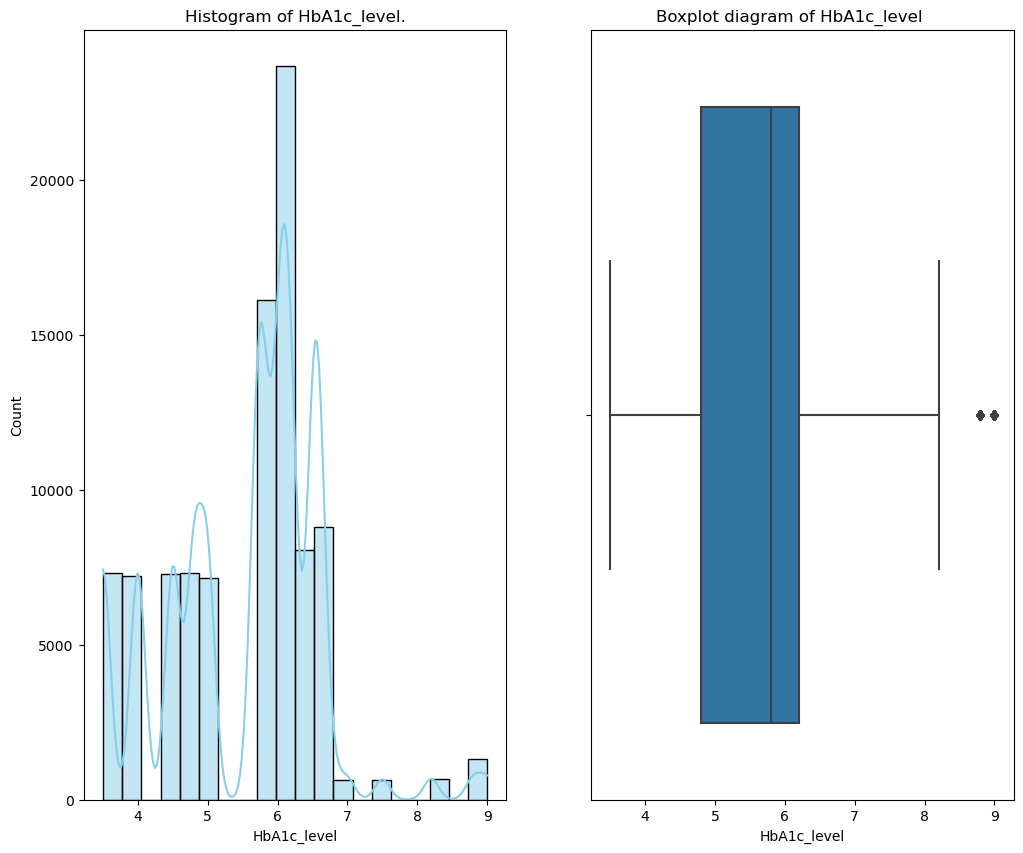

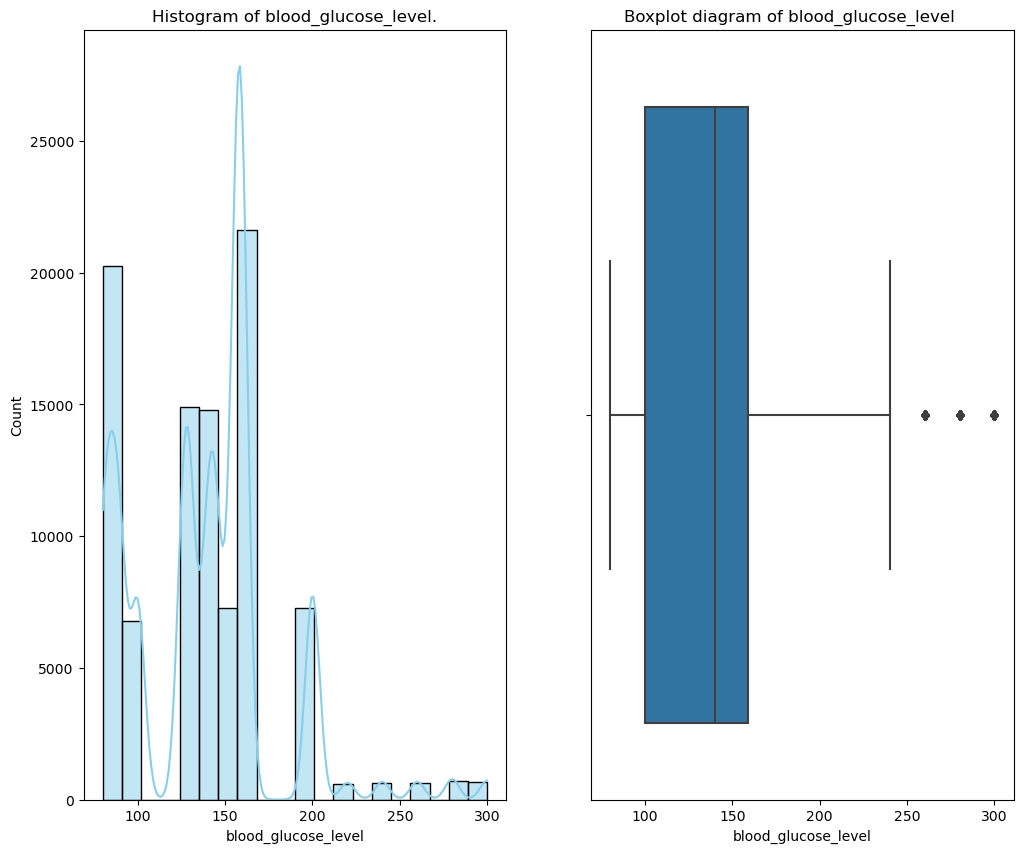

In [14]:
for col in numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

In [15]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    
    plt.show()

 Univariate analysis for gender column:


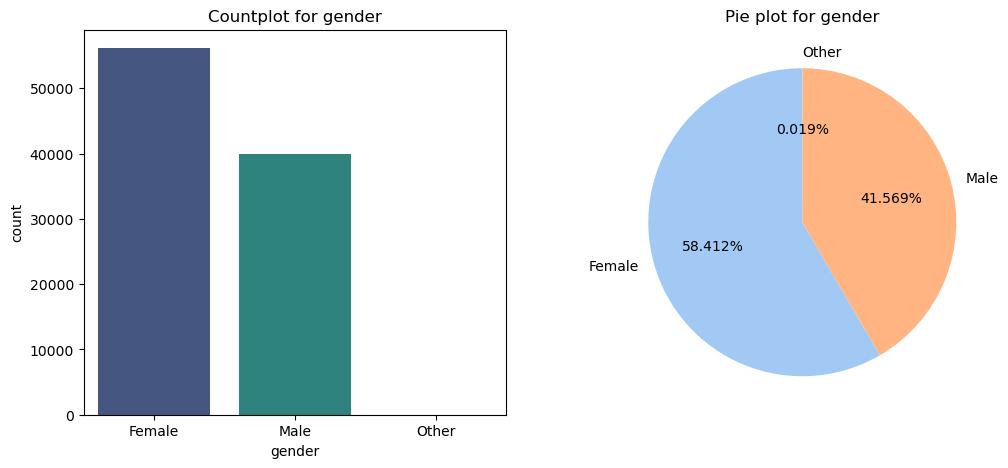

 Univariate analysis for hypertension column:


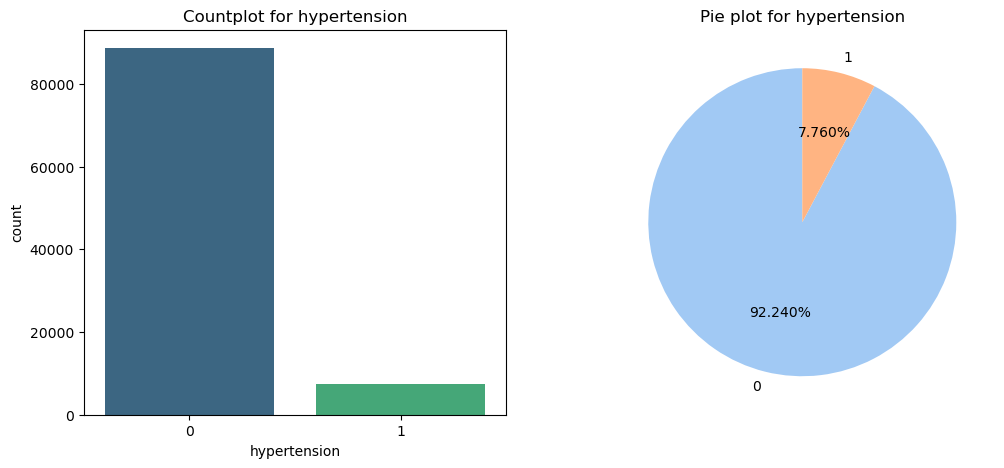

 Univariate analysis for heart_disease column:


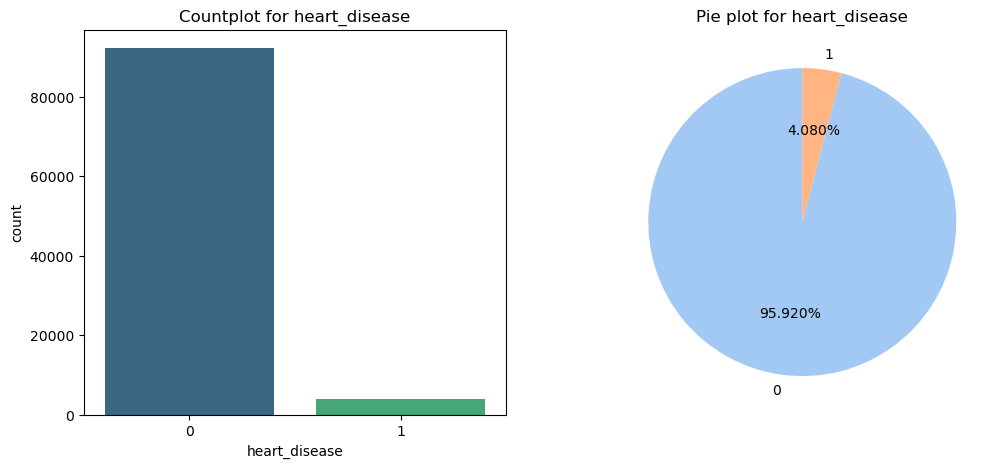

 Univariate analysis for smoking_history column:


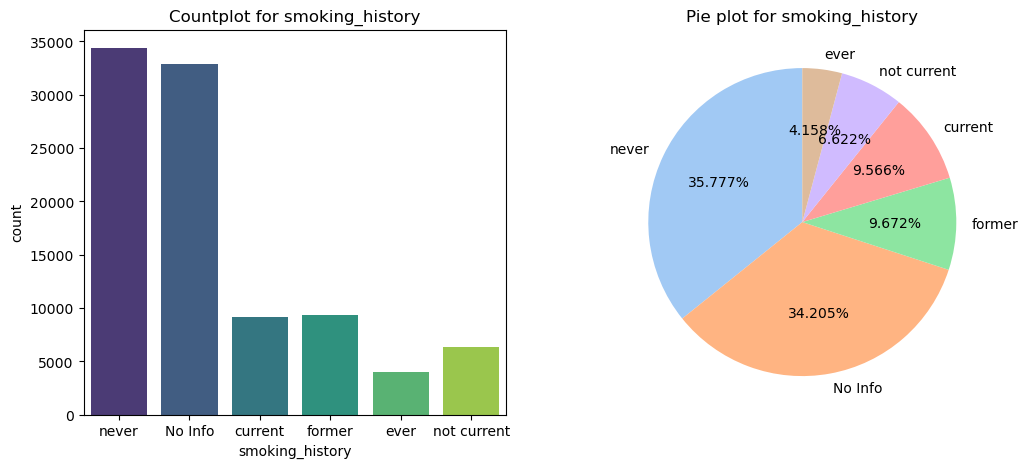

 Univariate analysis for diabetes column:


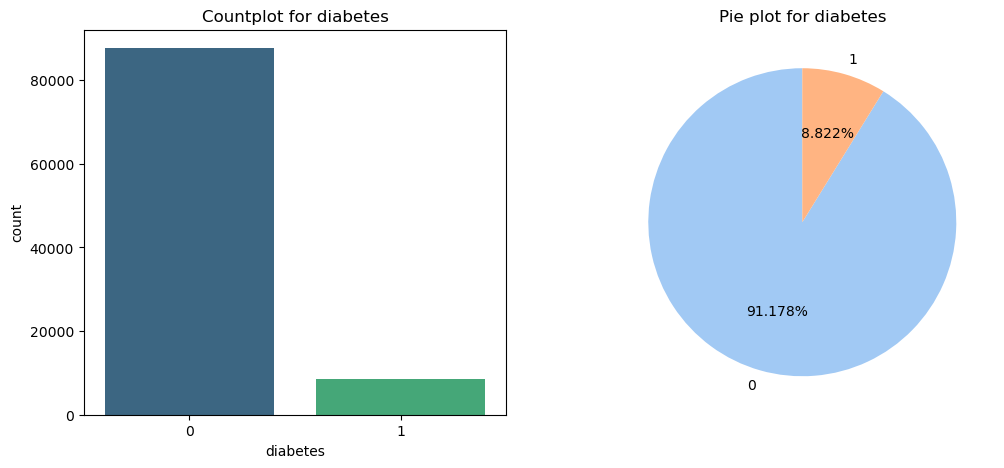

In [16]:
for col in non_numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


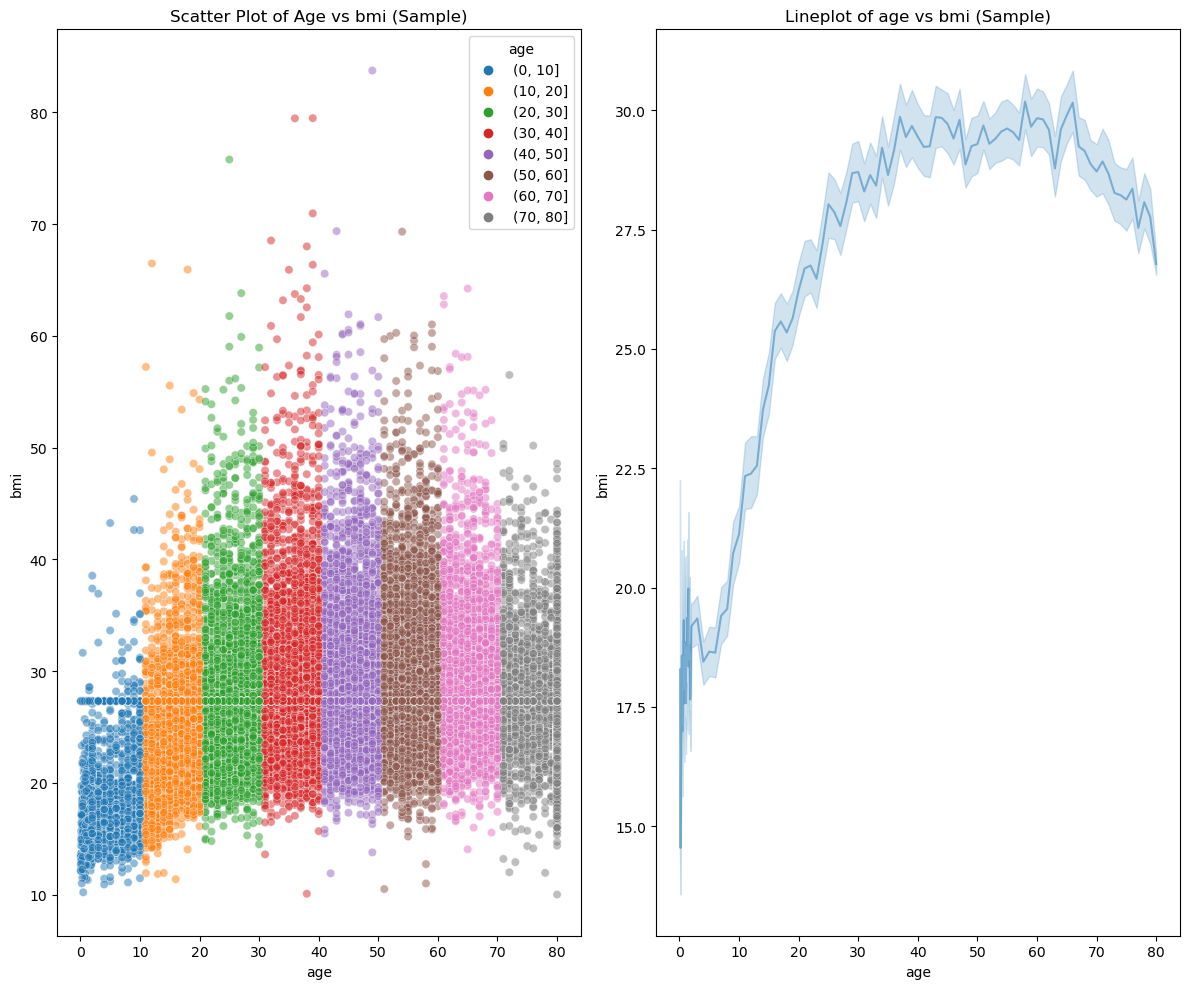

C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


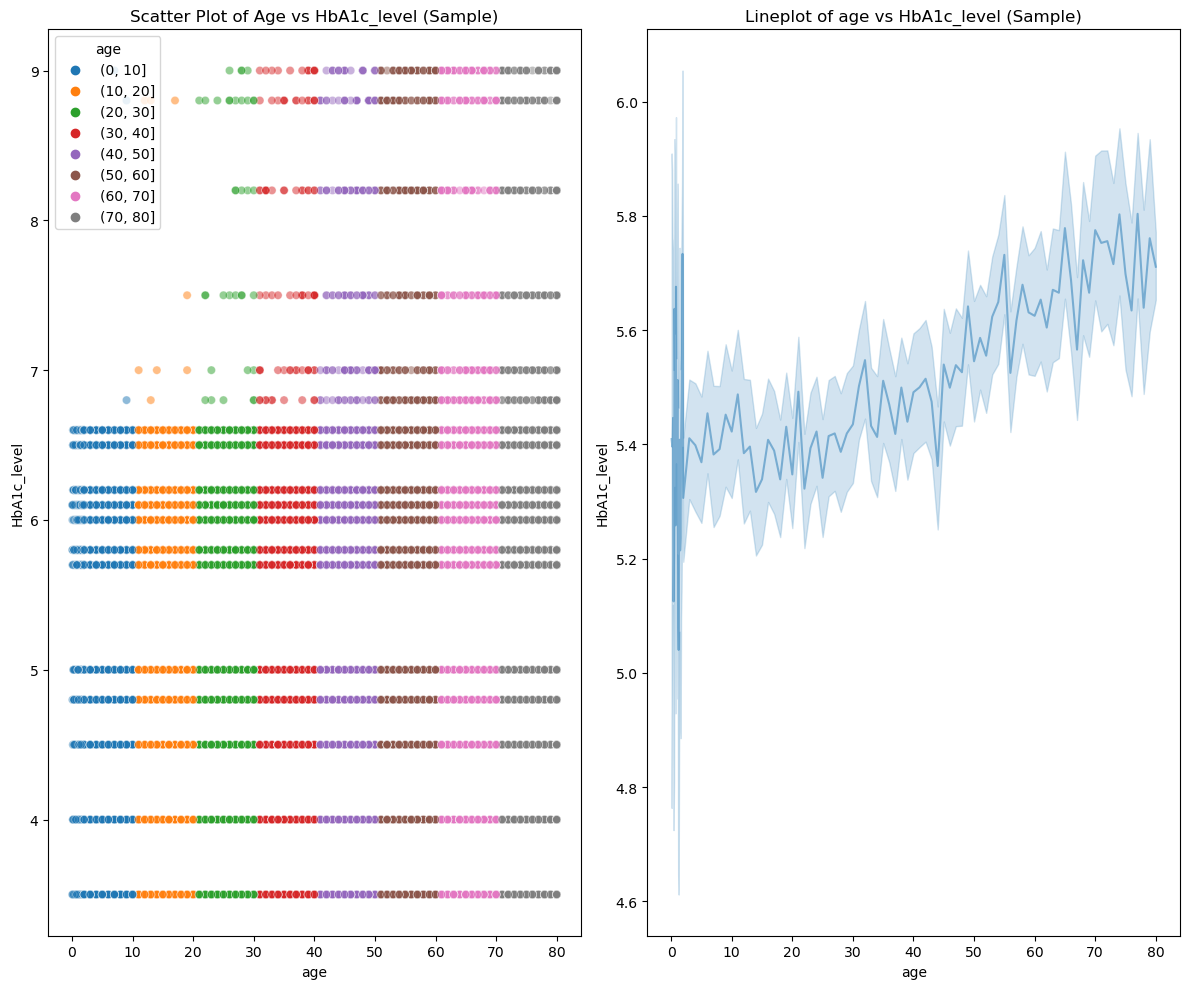

C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


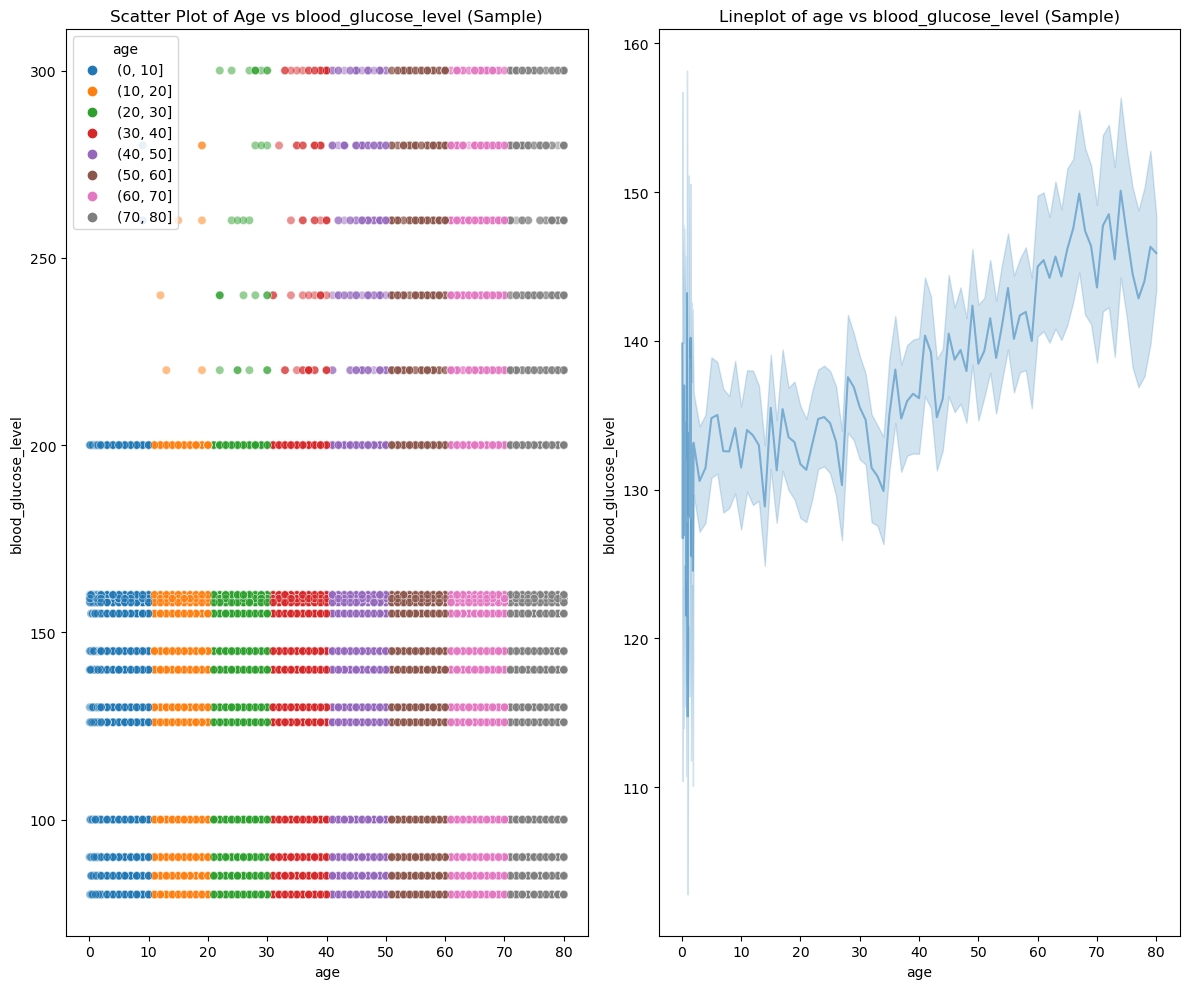

In [17]:
sample_size = 30000  
sample_df = df.sample(n=sample_size, random_state=42) 
age_group = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

for col in numeric_col[1:]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 10))
    sns.scatterplot(x='age', y=df[col], data=sample_df,hue=age_group, alpha=0.5,ax=ax[0])
    ax[0].set_title(f'Scatter Plot of Age vs {col} (Sample)')
    
    sns.lineplot(x='age',y=df[col],data=sample_df,alpha=0.5,ax=ax[1])
    ax[1].set_title(f'Lineplot of age vs {col} (Sample)')
    plt.tight_layout()
    plt.show()

In [18]:
print(sample_df['age'].mean())
print(df['age'].mean())

41.85690399999999
41.79432571297817


AttributeError: 'pandas._libs.interval.Interval' object has no attribute 'startswith'

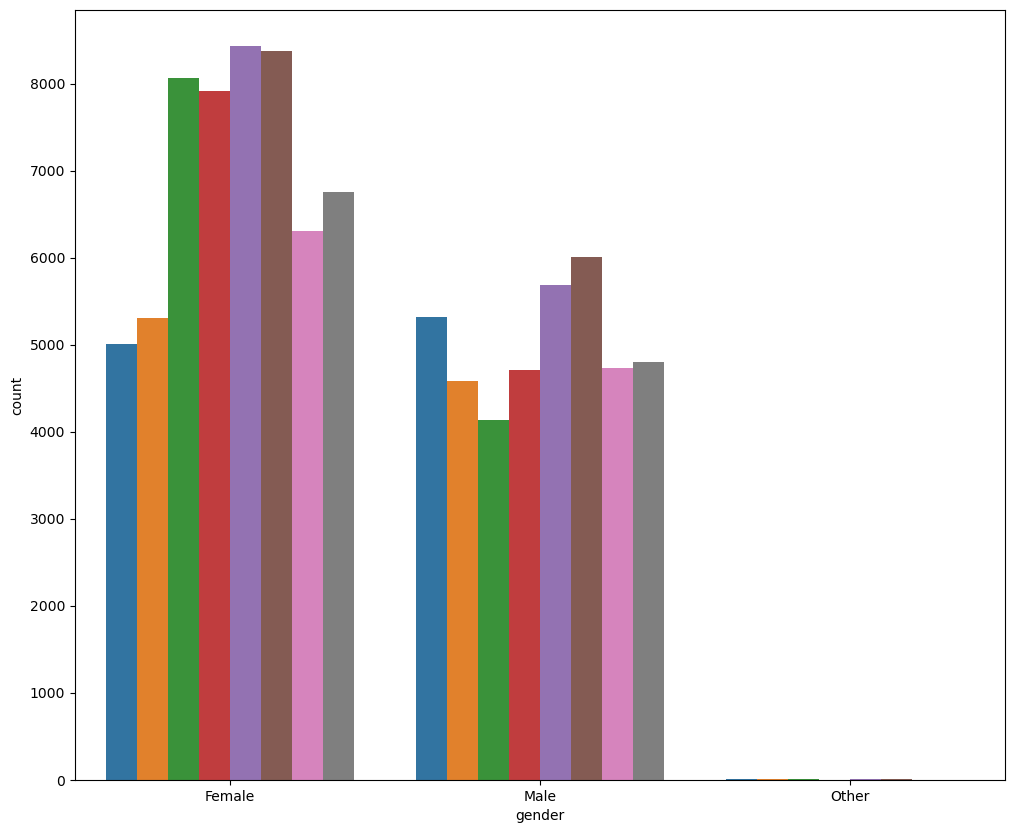

In [19]:
age_group = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
for i in non_numeric_col:
    plt.figure(figsize=(12,10))
    sns.countplot(x=df[i],data=df,hue=age_group)
    plt.title(f'Age distribution vs {i}')
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in non_numeric_col:
    sample_df[col]=le.fit_transform(sample_df[col])
sample_df

In [22]:
x = sample_df.drop('diabetes', axis=1)
y = sample_df['diabetes']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Example dataset (replace 'x' and 'y' with your actual dataset variables)
# Assuming 'x' contains a categorical column like 'Gender'
# If your dataset is already numeric, you can skip the encoding step.

# Encoding categorical data
label_encoder = LabelEncoder()
if isinstance(x, pd.DataFrame):  # Check if x is a pandas DataFrame
    for column in x.select_dtypes(include=['object']).columns:  # Select categorical columns
        x[column] = label_encoder.fit_transform(x[column])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Initializing and training the SVM model
model_svm = SVC(kernel='linear', random_state=0)
model_svm.fit(X_train, y_train)

# Making predictions
y_pred = model_svm.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9613333333333334
Confusion Matrix:
 [[8183   28]
 [ 320  469]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8211
           1       0.94      0.59      0.73       789

    accuracy                           0.96      9000
   macro avg       0.95      0.80      0.85      9000
weighted avg       0.96      0.96      0.96      9000



In [26]:
y_pred = model_svm.predict(X_test)

In [27]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.9613333333333334


In [28]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8211
           1       0.94      0.59      0.73       789

    accuracy                           0.96      9000
   macro avg       0.95      0.80      0.85      9000
weighted avg       0.96      0.96      0.96      9000



In [29]:
!pip install tensorflow


In [30]:
import tensorflow as tf

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


C:\Users\Dayam Nadeem\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9159 - loss: 0.2967 - val_accuracy: 0.9299 - val_loss: 0.2222
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9296 - loss: 0.2127 - val_accuracy: 0.9210 - val_loss: 0.2898
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9394 - loss: 0.1791 - val_accuracy: 0.9524 - val_loss: 0.1308
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9466 - loss: 0.1518 - val_accuracy: 0.9484 - val_loss: 0.1361
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9485 - loss: 0.1449 - val_accuracy: 0.9569 - val_loss: 0.1188
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9515 - loss: 0.1365 - val_accuracy: 0.9588 - val_loss: 0.1144
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9549 - loss: 0.1264 - val_accuracy: 0.9600 - val_loss: 0.1163
Epoch 8/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9542 - loss: 0.1269 - 

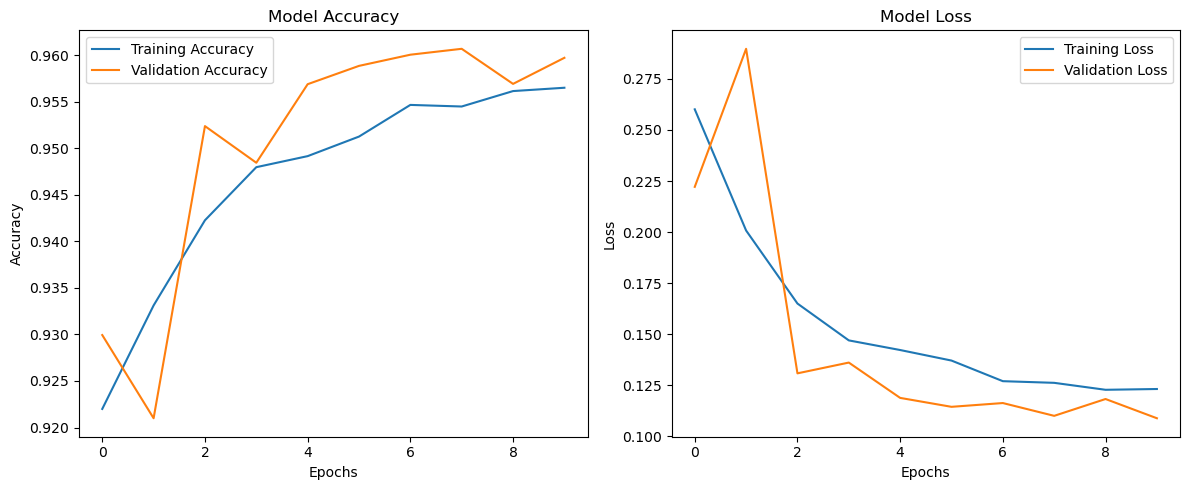

In [31]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r'C:\Users\Dayam Nadeem\Documents\7th sem minor diabeties\diabetes_prediction_dataset.csv')

# Print the first few rows to inspect the data
print(df.head())

# Convert categorical variables to numeric (One-Hot Encoding for non-ordinal columns like 'Gender')
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y) - replace 'diabetes' with your actual target column name
X = df.drop('diabetes', axis=1)  # Replace 'diabetes' with your correct target column
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a simple Keras model (you can adjust the architecture as needed)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot accuracy graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [64]:
# Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TensorFlow Lite format and saved as 'model.tflite'")


INFO:tensorflow:Assets written to: C:\Users\DAYAMN~1\AppData\Local\Temp\tmppx14tl3a\assets


INFO:tensorflow:Assets written to: C:\Users\DAYAMN~1\AppData\Local\Temp\tmppx14tl3a\assets


Saved artifact at 'C:\Users\DAYAMN~1\AppData\Local\Temp\tmppx14tl3a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1357993544592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1357993548432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1357993549968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1357993550928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1357993550160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1357993549008: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted to TensorFlow Lite format and saved as 'model.tflite'
